In [308]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import StandardScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
import random
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from scipy.cluster.hierarchy import dendrogram, linkage
random.seed(42)
from scipy import stats
import numpy as np
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from sklearn import metrics

## Data Overview

In [309]:
df = pd.read_csv("https://raw.githubusercontent.com/supragyabajpai/SchulichJourney_DataScience/main/Datasets/Customer_Data.csv")

In [310]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [312]:
df.describe(include="all")

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
unique,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,C10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,NaN,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,NaN,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,NaN,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,NaN,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000


In [313]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

## Data Preprocessing

In [314]:
null_columns = df.columns[df.isnull().any()].tolist()
print(null_columns)

['CREDIT_LIMIT', 'MINIMUM_PAYMENTS']


In [315]:
df.dropna(inplace= True, axis=0)

In [316]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8636 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8636 non-null   object 
 1   BALANCE                           8636 non-null   float64
 2   BALANCE_FREQUENCY                 8636 non-null   float64
 3   PURCHASES                         8636 non-null   float64
 4   ONEOFF_PURCHASES                  8636 non-null   float64
 5   INSTALLMENTS_PURCHASES            8636 non-null   float64
 6   CASH_ADVANCE                      8636 non-null   float64
 7   PURCHASES_FREQUENCY               8636 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8636 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8636 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8636 non-null   float64
 11  CASH_ADVANCE_TRX                  8636 non-null   int64  
 12  PURCHASES_T

## Data Visulization

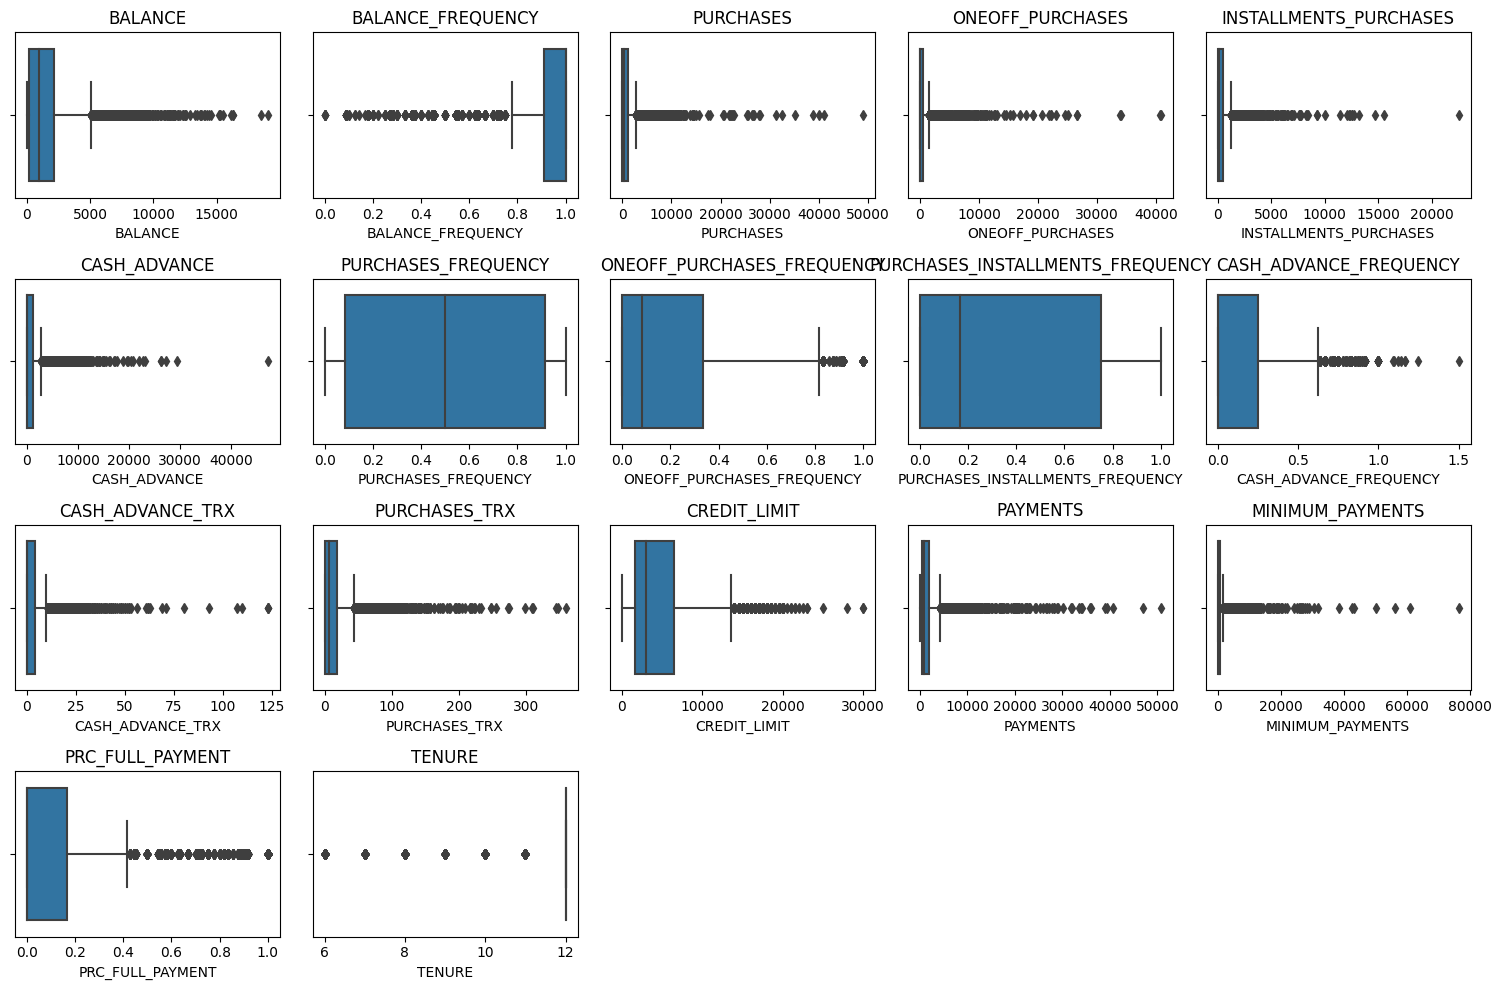

In [317]:
def data_distribution():
    columns_to_visualize = [
        'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES',
        'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
        'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX',
        'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS',
        'PRC_FULL_PAYMENT', 'TENURE'
    ]

    plt.figure(figsize=(15, 10))
    for i, column in enumerate(columns_to_visualize, 1):
        plt.subplot(4, 5, i)
        sns.boxplot(data=df, x=column)
        plt.title(column)

    plt.tight_layout()
    plt.show()

data_distribution()

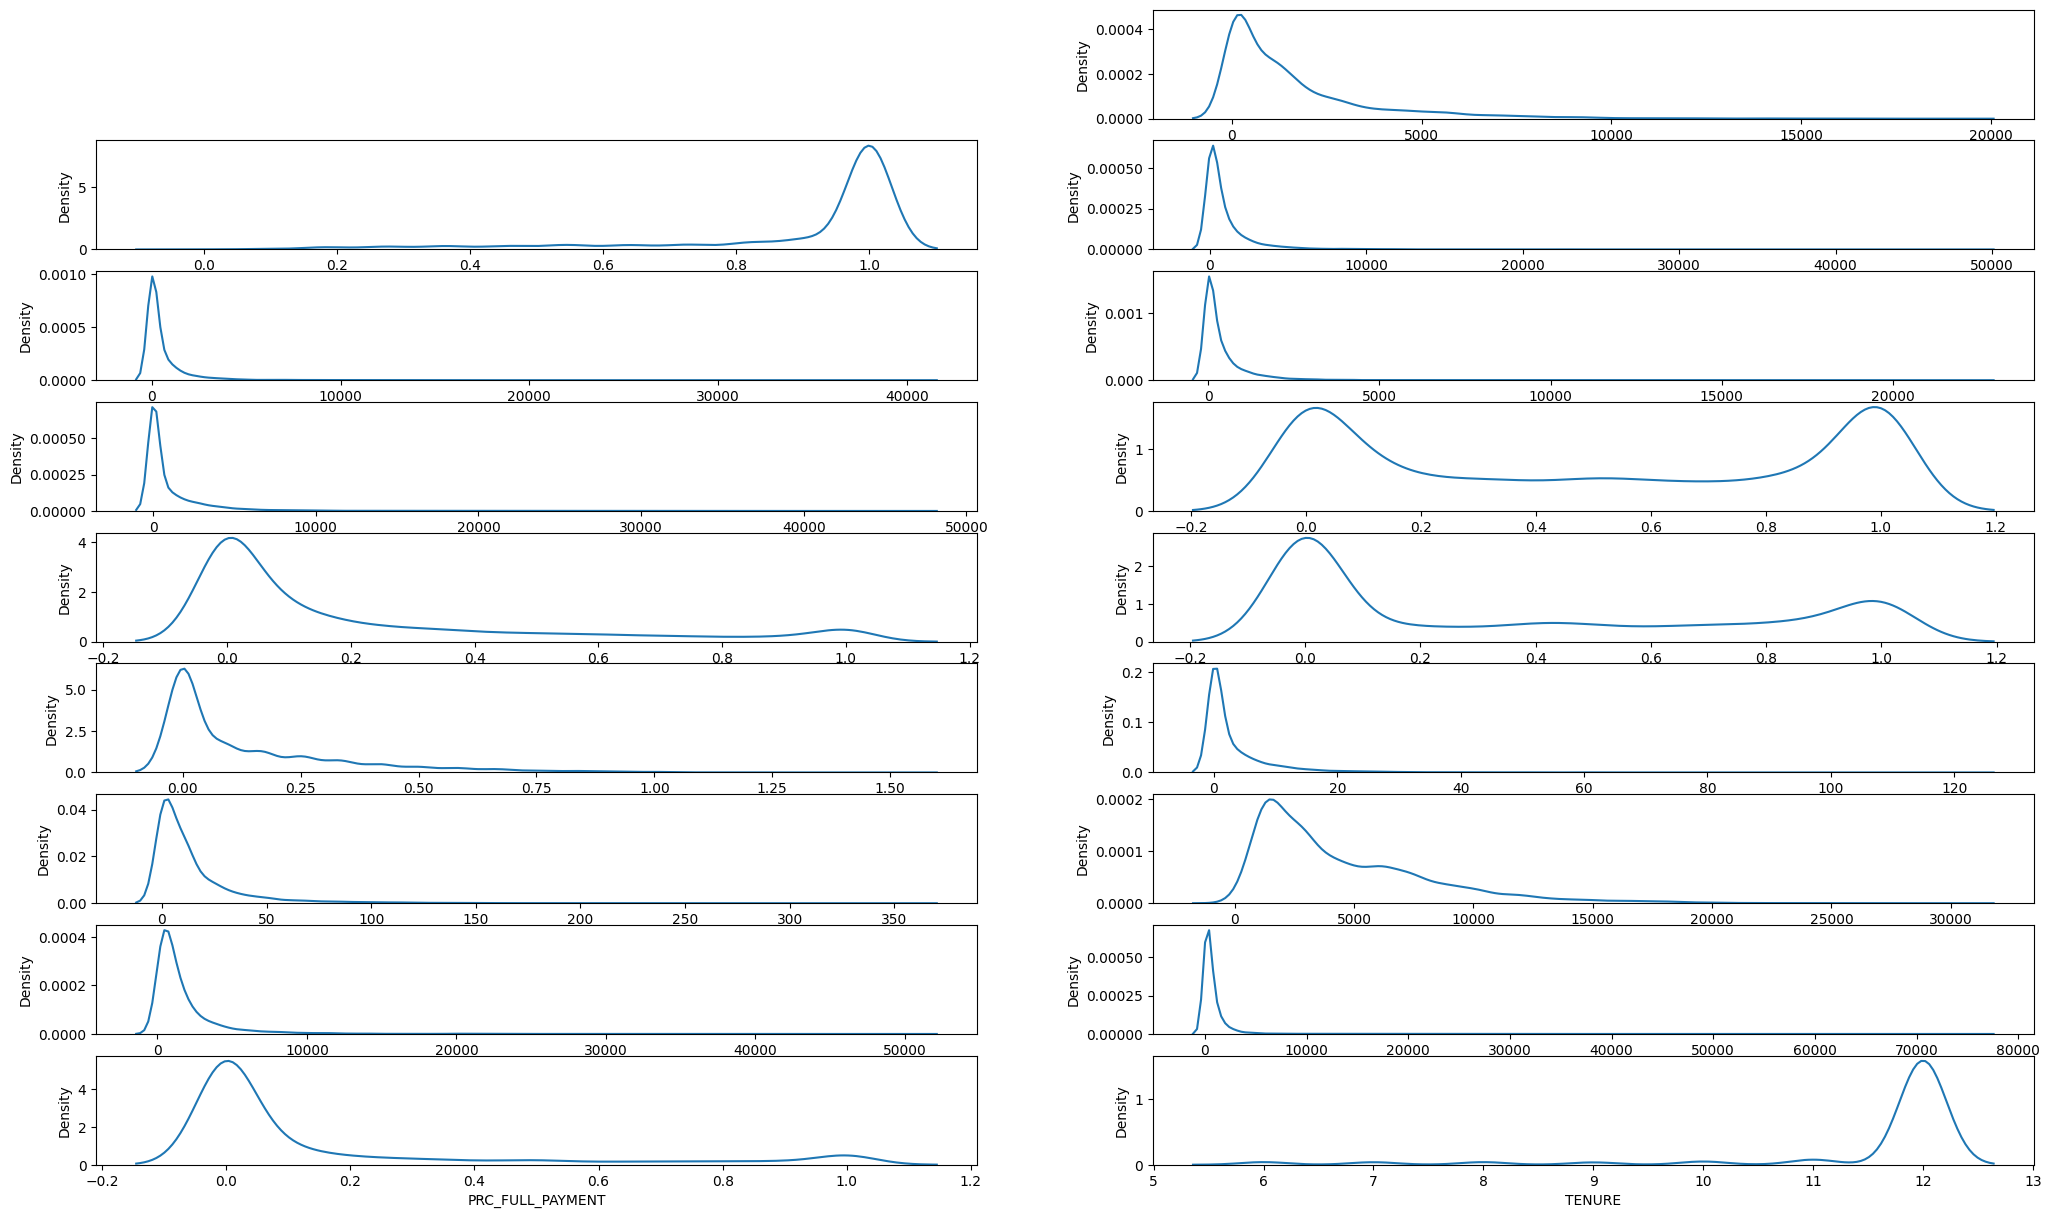

In [318]:
plt.figure(figsize=(25,15))
for i, col in enumerate(df.columns):
    if df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

     With the above two visualizations, we can see that the data is heavily skewed and also contains some outliers.

In [319]:
#We will remove a few highly distinctive outliers.
df = df[df['CASH_ADVANCE_FREQUENCY'] <= 1]
df = df[df['CASH_ADVANCE'] < 40000]
df = df[df['MINIMUM_PAYMENTS'] < 70000]
# we will create a copy of orignal dataframe for clustering
df_clustering = df.copy()

## EDA

    Univariate Analysis

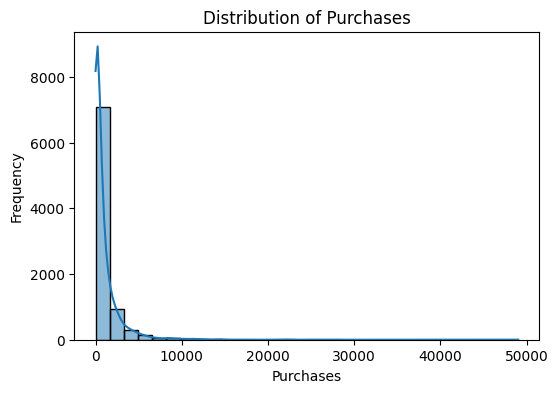

In [320]:
#What is the Purchases distribution?

plt.figure(figsize=(6, 4))
sns.histplot(df['PURCHASES'], bins=30, kde=True)
plt.title('Distribution of Purchases')
plt.xlabel('Purchases')
plt.ylabel('Frequency')
plt.show()

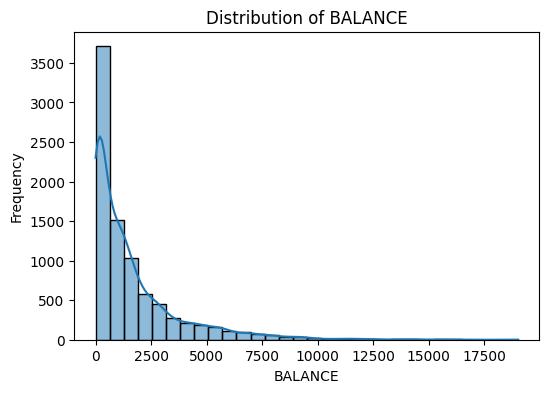

In [321]:
# What is the Balance distribution?

plt.figure(figsize=(6, 4))
sns.histplot(df['BALANCE'], bins=30, kde=True)
plt.title('Distribution of BALANCE')
plt.xlabel('BALANCE')
plt.ylabel('Frequency')
plt.show()

    From the analysis of our customer segments and the histograms, we can observe that the majority of our customers fall into the category of 'lower balance and purchase' customers. 

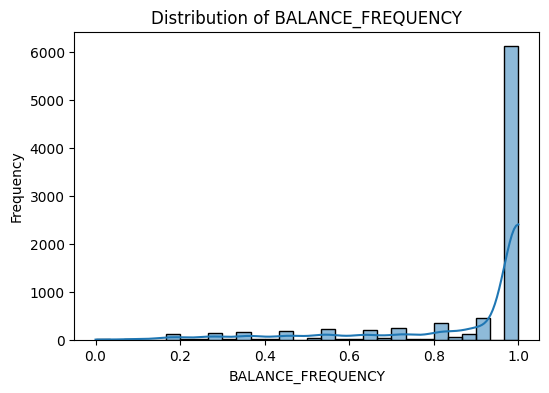

In [322]:
# What is the distribution of BALANCE_FREQUENCY?
plt.figure(figsize=(6, 4))
sns.histplot(df['BALANCE_FREQUENCY'], bins=30, kde=True)
plt.title('Distribution of BALANCE_FREQUENCY')
plt.xlabel('BALANCE_FREQUENCY')
plt.ylabel('Frequency')
plt.show()

    Most of credit card accounts have 1 score in BALANCE_FREQUENCY column, which indicates that most customers use credit card frequently

In [323]:
# Top ten purchases in a single transaction.
top_ten_oneoff_purchases = df.sort_values(by='ONEOFF_PURCHASES', ascending=False).head(10)

print("Top Ten Purchases in 'ONEOFF_PURCHASES':")
print(top_ten_oneoff_purchases[['CUST_ID', 'ONEOFF_PURCHASES']])


Top Ten Purchases in 'ONEOFF_PURCHASES':
     CUST_ID  ONEOFF_PURCHASES
550   C10574          40761.25
501   C10523          40624.06
3937  C14048          34087.73
1604  C11657          33803.84
273   C10284          26547.43
7046  C17237          26514.32
1447  C11495          25122.77
1256  C11300          24543.52
587   C10611          23032.97
507   C10529          22257.39


In [324]:
# Bottom ten purchases

bottom_ten_minimum_payments = df.sort_values(by='MINIMUM_PAYMENTS').head(10)

print("Bottom Ten Purchases with 'MINIMUM_PAYMENTS':")
print(bottom_ten_minimum_payments[['CUST_ID', 'MINIMUM_PAYMENTS']])


Bottom Ten Purchases with 'MINIMUM_PAYMENTS':
     CUST_ID  MINIMUM_PAYMENTS
1978  C12041          0.019163
7927  C18142          0.037744
3787  C13895          0.055880
8014  C18231          0.059481
1419  C11467          0.117036
5875  C16040          0.261984
8713  C18950          0.311953
7678  C17884          0.319475
7971  C18187          1.113027
4332  C14453          1.334075


    Understanding the behavior of these above two categories of customers can help provide better business recommendations.

    Bivariate Analysis

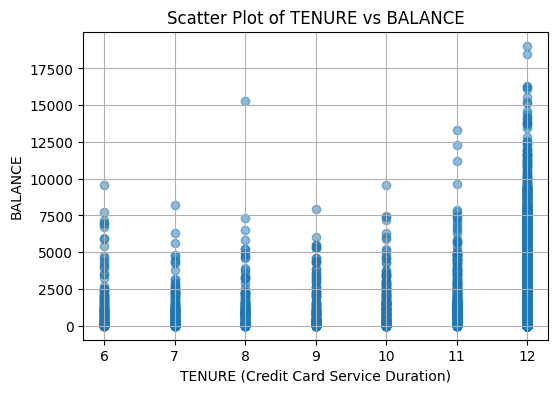

In [325]:
#Analyzing the relationship between 'TENURE' and 'BALANCE' to determine if the duration of the credit card service
#  impacts the balance maintained by customers. 
plt.figure(figsize=(6, 4))
plt.scatter(df['TENURE'], df['BALANCE'], alpha=0.5)
plt.title('Scatter Plot of TENURE vs BALANCE')
plt.xlabel('TENURE (Credit Card Service Duration)')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

    Customers with higher balances and a tenure of 12 months are indicative of a loyal and stable customer segment. It's an opportunity for the credit card provider to focus on retaining and further serving the financial needs of these customers.

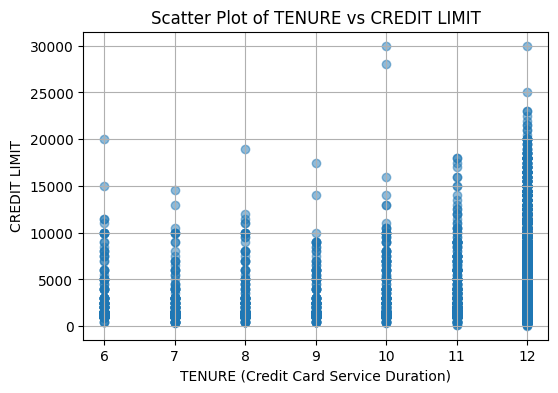

In [326]:
#Exploring how 'TENURE' is related to 'CREDIT LIMIT' to understand how the duration of the credit card service
# impacts the credit limits assigned to customers.
plt.figure(figsize=(6,4))
plt.scatter(df['TENURE'], df['CREDIT_LIMIT'], alpha=0.5)
plt.title('Scatter Plot of TENURE vs CREDIT LIMIT')
plt.xlabel('TENURE (Credit Card Service Duration)')
plt.ylabel('CREDIT LIMIT')
plt.grid(True)
plt.show()

    if we look at customers with higher account balances, longer tenures, and higher credit limits, it indicates a segment of creditworthy, loyal, and potentially financially stable customers. For our credit card provider, it's important to continue serving the financial needs of these customers and ensure they remain satisfied and engaged with the services offered.

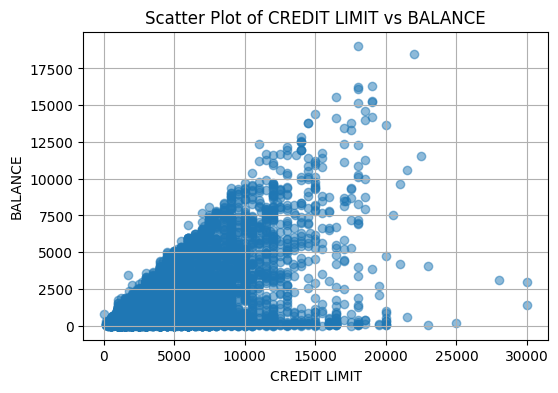

In [327]:
#relationship between 'CREDIT LIMIT' and 'BALANCE' to understand whether customers utilize their credit limits 
# effectively or if they tend to maintain lower balances.
plt.figure(figsize=(6, 4))
plt.scatter(df['CREDIT_LIMIT'], df['BALANCE'], alpha=0.5)
plt.title('Scatter Plot of CREDIT LIMIT vs BALANCE')
plt.xlabel('CREDIT LIMIT')
plt.ylabel('BALANCE')
plt.grid(True)
plt.show()

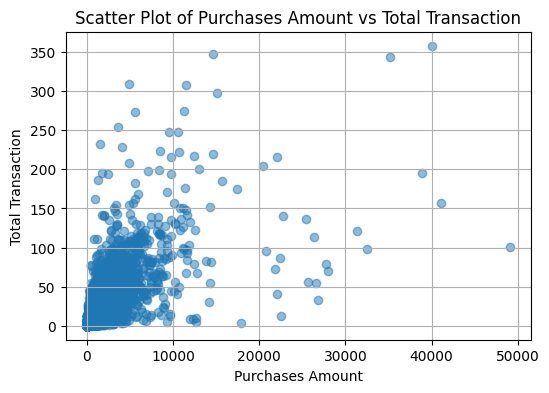

In [328]:
#Purchases Amount vs Total Transaction

plt.figure(figsize=(6, 4))
plt.scatter(df['PURCHASES'], df['PURCHASES_TRX'], alpha=0.5)
plt.title('Scatter Plot of Purchases Amount vs Total Transaction')
plt.xlabel('Purchases Amount')
plt.ylabel('Total Transaction')
plt.grid(True)
plt.show()

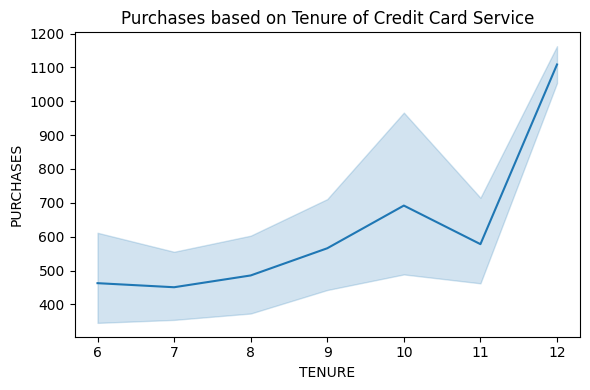

In [329]:
plt.figure(figsize=(6, 4))
# Line plot of Purchases based on Tenure
sns.lineplot(x='TENURE', y='PURCHASES', data=df)
plt.title('Purchases based on Tenure of Credit Card Service')

plt.tight_layout()
plt.show()

    With an increase in the duration of card usage, the purchase price increases, especially over the course of a year, due to a significant difference between it and the others.

## Hopkins test

    The Hopkins statistic (Lawson and Jurs 1990) is used to assess the clustering tendency of a data set by measuring the probability that a given data set is generated by uniform data distribution. In other words, it tests the spatial randomness of the data.

    https://sushildeore99.medium.com/really-what-is-hopkins-statistic-bad1265df4b#:~:text=The%20Hopkins%20statistic%20(Lawson%20and%20Jurs%201990)%20is%20used%20to%20assess%20the%20clustering%20tendency%20of%20a%20data%20set%20by%20measuring%20the%20probability%20that%20a%20given%20data%20set%20is%20generated%20by%20uniform%20data%20distribution.%20In%20other%20words%2C%20it%20tests%20the%20spatial%20randomness%20of%20the%20data.

In [330]:
# We will scale the data since, 
# It's preferable to scale the data before using hopkins algorithm as they use distance between observations.
# https://pypi.org/project/pyclustertend/#:~:text=It%27s%20preferable%20to%20scale%20the%20data%20before%20using%20hopkins%20or%20vat%20algorithm%20as%20they%20use%20distance%20between%20observations.

numerical_features = ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 
'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features)])
df[numerical_features] = preprocessor.fit_transform(df[numerical_features])

In [331]:
df_scaled = df.copy()
df_scaled.drop(['CUST_ID'], inplace=True, axis=1)

In [332]:
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan

def hopkins(X):
  d = X.shape[1]
  n = len(X) 
  m = int(0.1 * n)
  nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
  rand_X = sample(range(0, n, 1), m)
 
  ujd = []
  wjd = []
  for j in range(0, m):
     u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
     ujd.append(u_dist[0][1])
     w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
     wjd.append(w_dist[0][1])
 
  H = sum(ujd) / (sum(ujd) + sum(wjd))
  if isnan(H):
     print(ujd, wjd)
     H = 0
 
  return H

In [333]:
H = hopkins(df_scaled)
print("Hopkins Statistic:", H)

Hopkins Statistic: 0.9632786283801247


    From the above value of 0.96, we can conclude that the data set is not uniformly distributed (i.e., it contains meaningful clusters).   

## Clustering

    PCA: We will perform Principal Component Analysis (PCA) to reduce the high-dimensional data to lower dimensions while preserving as much information as possible.

In [334]:
pca = PCA()
df_pca = pca.fit_transform(df_scaled)

pca_columns = [f'PC{i + 1}' for i in range(len(df_scaled.columns))]
df_pca = pd.DataFrame(df_pca, columns=pca_columns)

explained_variance = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)
output_df = pd.DataFrame({'Explained Variance Ratio': explained_variance, 'Cumulative Explained Variance Ratio': cumulative_variance})
print(output_df)

    Explained Variance Ratio  Cumulative Explained Variance Ratio
0               2.727102e-01                             0.272710
1               2.038410e-01                             0.476551
2               8.938589e-02                             0.565937
3               7.559135e-02                             0.641528
4               6.212816e-02                             0.703657
5               5.676950e-02                             0.760426
6               4.946765e-02                             0.809894
7               4.233873e-02                             0.852232
8               3.690548e-02                             0.889138
9               3.062939e-02                             0.919767
10              2.365614e-02                             0.943424
11              1.768466e-02                             0.961108
12              1.433227e-02                             0.975440
13              1.191554e-02                             0.987356
14        

    91% of the total variance can be seen by including the first 9 principal components.
    We will go with 9 Components since it gives least amount of dimensions with more explained variance

In [335]:
df_pca = df_pca.iloc[:,0:9]

    KMeans Clustering

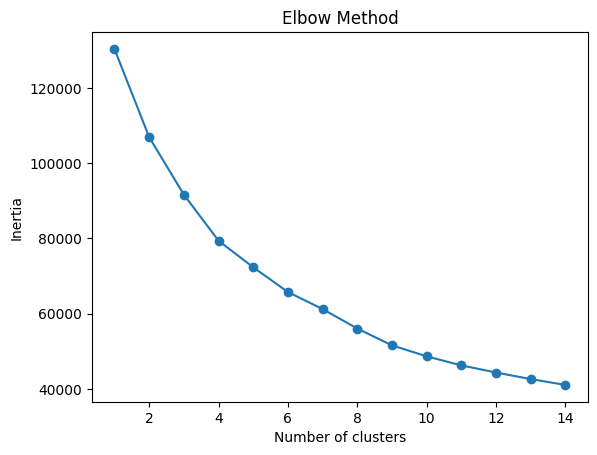

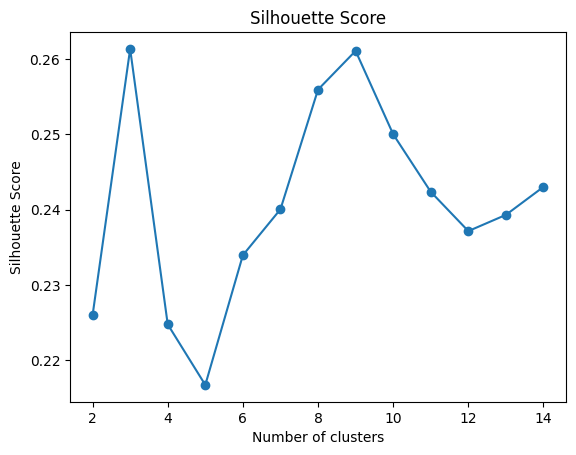

In [336]:
inertia = []
silhouette_avg = []

for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df_pca)
    inertia.append(kmeans.inertia_)
    klabels = kmeans.labels_
    centers = kmeans.cluster_centers_

    if i>1:
        silhouette_avg = silhouette_avg + [silhouette_score(df_pca, klabels)]

# Silhouette Score
plt.plot(range(1, 15), inertia,marker = 'o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()
 
plt.plot(range(2, 15), silhouette_avg,marker = 'o')
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

    Based on the information provided by the two graphs above, we can conclude that our data can be effectively clustered into 4 groups. At 4 clusters, the elbow curve's inertia reduces slowly, and the Silhouette Score is also favorable.

For K-Means Algorithm
calinski_harabasz_score is:  1844.5346768606773
silhouette_score is:  0.22464253996864272


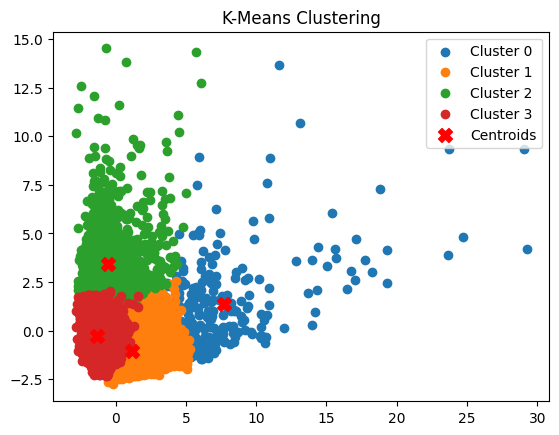

In [337]:
kmeans_model = KMeans(n_clusters=4, random_state=1).fit(df_pca)
klabels = kmeans_model.labels_

ch_kmeans = metrics.calinski_harabasz_score(df_pca, klabels)
ss_kmeans = metrics.silhouette_score(df_pca, klabels, metric='euclidean')

print("For K-Means Algorithm")
print("calinski_harabasz_score is: ", ch_kmeans)
print("silhouette_score is: ", ss_kmeans)

x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values

centroids = kmeans_model.cluster_centers_

for cluster_label in set(klabels):
    cluster_x = x_values[klabels == cluster_label]
    cluster_y = y_values[klabels == cluster_label]
    plt.scatter(cluster_x, cluster_y, label=f'Cluster {cluster_label}')

plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=100, label='Centroids')

plt.title('K-Means Clustering')
plt.legend()
plt.show()


    DBSCAN

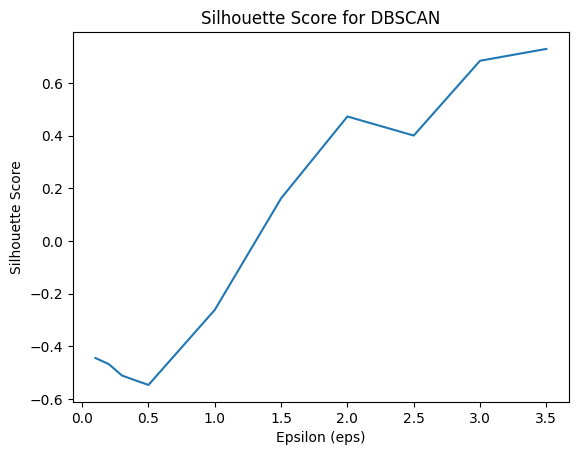

In [338]:
eps_values = [0.1, 0.2, 0.3, 0.4, 0.5, 1 , 1.5, 2, 2.5, 3, 3.5]  
silhouette_avg = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=4)
    dlabels = dbscan.fit_predict(df_pca)
    
    if len(set(dlabels)) > 1:  
        silhouette_avg.append(silhouette_score(df_pca, dlabels))
    else:
        silhouette_avg.append(0)

plt.plot(eps_values, silhouette_avg, )
plt.title('Silhouette Score for DBSCAN')
plt.xlabel('Epsilon (eps)')
plt.ylabel('Silhouette Score')
plt.show()

    Based on the graph above, I have chosen to use an epsilon value of 3.

For DBSCAN Algorithm
calinski_harabasz_score is:  757.0781606935769
silhouette_score is:  0.6839807863345123


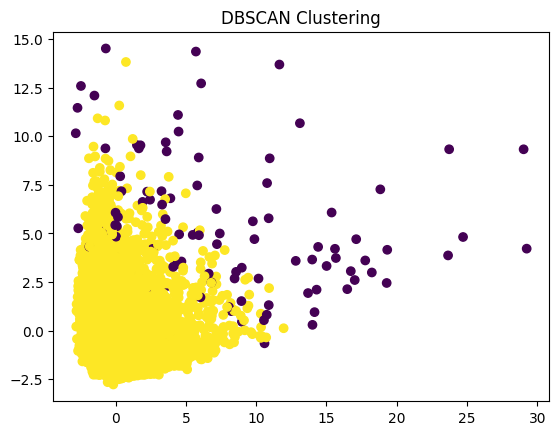

In [339]:
dbscan = DBSCAN(eps=3, min_samples=4)
dbscan_labels = dbscan.fit_predict(df_pca)

ch_dbscan = metrics.calinski_harabasz_score(df_pca, dbscan_labels)
ss_dbscan = metrics.silhouette_score(df_pca, dbscan_labels)

print("For DBSCAN Algorithm")
print("calinski_harabasz_score is: ", ch_dbscan)
print("silhouette_score is: ", ss_dbscan)

x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values

plt.scatter(x_values,y_values, c=dbscan_labels)
plt.title('DBSCAN Clustering')
plt.show()

    Hierarchical Clustering (Agglomerative)

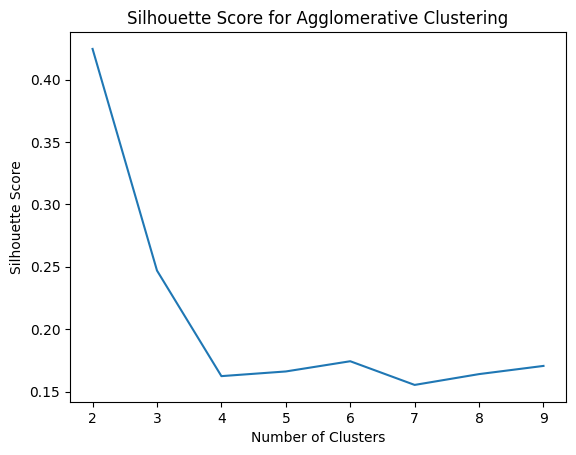

Text(0.5, 1.0, 'Dendrogram')

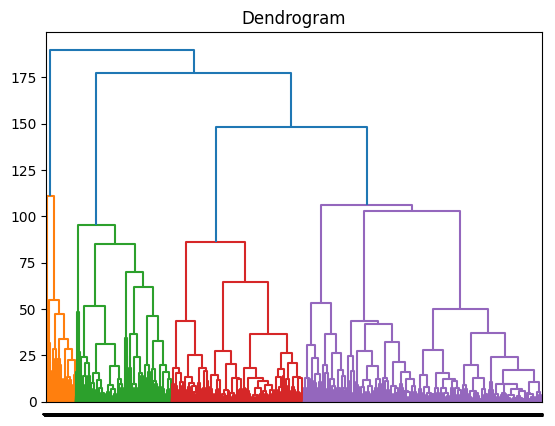

In [340]:
n_clusters_range = range(2, 10)
silhouette_scores = []

for n_clusters in n_clusters_range:
    agglomerative = AgglomerativeClustering(n_clusters=n_clusters)
    alabels = agglomerative.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, alabels)
    silhouette_scores.append(silhouette_avg)

plt.plot(n_clusters_range, silhouette_scores)
plt.title('Silhouette Score for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

linkage_matrix = linkage(df_pca, method='ward')

dendrogram(linkage_matrix, orientation='top', labels=alabels)
plt.title('Dendrogram')


    We can say that we can create four clusters, which we conclude based on the above-created dendrogram.

For Agglomerative Clustering
calinski_harabasz_score is:  1497.42901905829
silhouette_score is:  0.16242226891419745


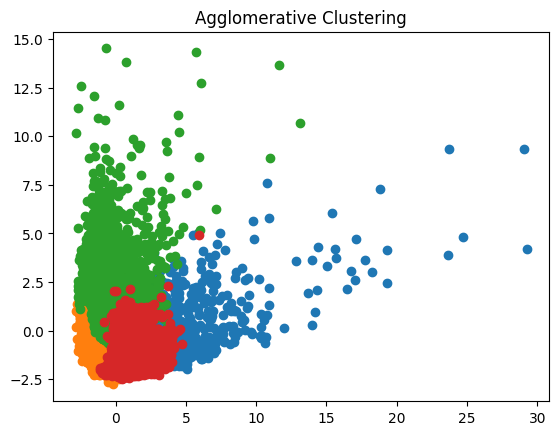

In [341]:
agglomerative = AgglomerativeClustering(n_clusters=4)
alabels = agglomerative.fit_predict(df_pca)

ch_agglomerative = metrics.calinski_harabasz_score(df_pca, alabels)
ss_agglomerative = metrics.silhouette_score(df_pca, alabels, metric='euclidean')

print("For Agglomerative Clustering")
print("calinski_harabasz_score is: ", ch_agglomerative)
print("silhouette_score is: ", ss_agglomerative)

x_values = df_pca.iloc[:, 0].values
y_values = df_pca.iloc[:, 1].values

for cluster_label in set(alabels):
    plt.scatter(x_values[alabels == cluster_label], y_values[alabels == cluster_label], label=f'Cluster {cluster_label}')

plt.title('Agglomerative Clustering')
plt.show()

In [342]:
ch_scores = [ch_kmeans, ch_dbscan, ch_agglomerative]
ss_scores = [ss_kmeans, ss_dbscan, ss_agglomerative]

data = {
    'Algorithm': ['K-Means', 'DBSCAN', 'Agglomerative'],
    'CH Score': ch_scores,
    'Silhouette Score': ss_scores,
}

score_df = pd.DataFrame(data)

print(score_df)

       Algorithm     CH Score  Silhouette Score
0        K-Means  1844.534677          0.224643
1         DBSCAN   757.078161          0.683981
2  Agglomerative  1497.429019          0.162422


    These results indicate that K-Means is effective in partitioning the data into distinct clusters with a reasonable level of internal data point similarity. 

## Cluster Analysis

In [343]:
# we will add the labels to the orignal dataframe 
df_clustering['Cluster'] = klabels

In [344]:
cluster_sizes = df_clustering['Cluster'].value_counts()

sorted_cluster_sizes = dict(sorted(cluster_sizes.items()))
for cluster_label, size in sorted_cluster_sizes.items():
    print(f"Cluster {cluster_label}: {size} data points")


Cluster 0: 255 data points
Cluster 1: 3293 data points
Cluster 2: 1209 data points
Cluster 3: 3869 data points


In [345]:
df_clustering.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,Cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12,2
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12,1
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12,3
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12,1


In [346]:
df_clustering.drop(['CUST_ID'], inplace=True, axis=1)

In [347]:
df_clustering.groupby('Cluster').mean().T

Cluster,0,1,2,3
BALANCE,4063.400134,989.639682,4549.694723,1027.009258
BALANCE_FREQUENCY,0.983565,0.953150,0.968729,0.816481
PURCHASES,9650.978706,1418.731989,515.628544,281.732585
ONEOFF_PURCHASES,6518.685412,711.136401,326.673259,212.881148
INSTALLMENTS_PURCHASES,3134.646235,707.785229,189.039380,69.203071
CASH_ADVANCE,789.089312,219.283051,4448.723356,570.452187
PURCHASES_FREQUENCY,0.940725,0.898365,0.288833,0.189533
ONEOFF_PURCHASES_FREQUENCY,0.759851,0.324991,0.137610,0.089553
PURCHASES_INSTALLMENTS_FREQUENCY,0.780648,0.724741,0.188067,0.095793
CASH_ADVANCE_FREQUENCY,0.075817,0.043768,0.472981,0.114374


<Figure size 800x400 with 0 Axes>

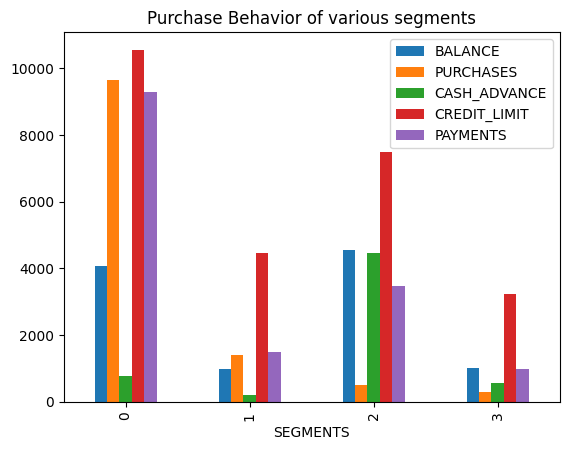

In [348]:
grouped_data = df_clustering[['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS', 'Cluster']].groupby('Cluster').mean()
plt.figure(figsize=(8, 4))
grouped_data.plot.bar()
plt.title('Purchase Behavior of various segments')
plt.xlabel('SEGMENTS')
plt.show()

<Figure size 1500x500 with 0 Axes>

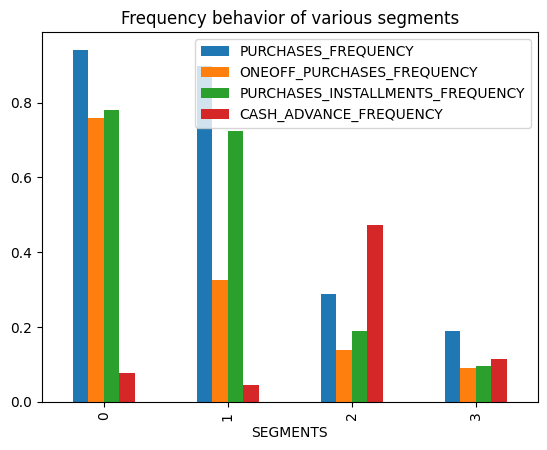

In [349]:
grouped_data2 = df_clustering[['PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'Cluster']].groupby('Cluster').mean()
plt.figure(figsize=(15, 5))
grouped_data2.plot.bar()
plt.title('Frequency behavior of various segments')
plt.xlabel('SEGMENTS')
plt.show()

    Customers in Cluster 0 (financially stable):

    These clients typically have larger balances, which may be an indication that they are well-off or that they simply like to have more money in their accounts.
    Their greater credit limits imply that they are reliable and have access to larger credit limits.
    They may use their credit cards as a source of liquidity if they make cash advances on a regular basis.
    Their proportion of complete payments is relatively high, indicating that they use credit cards responsibly.

    Cluster 1 (Conservative Spenders):

    The lower account balances of the customers in this cluster may indicate that they would rather have less money in their accounts.
    Their credit limits are lower and their purchase volume is lower, suggesting a more frugal spending pattern.
    Their lower frequency of cash advances indicates that they may not be dependent on them for transactions.
    This cluster may represent consumers who do not make frequent use of credit cards.

    Cluster 2 (Cash Advance Users):

    These customers have distinct spending habits as seen by their high balances and preference for cash advances over other payment methods.
    Their comparatively smaller purchase quantities might indicate that they rely more on cash advances than on real purchases.
    They have a high frequency of cash advances and use them in a sizable number of transactions.

    Cluster 3 (Low Activity Customers):

    These customers have distinct spending habits as seen by their high balances and preference for cash advances over other payment methods.
    Their comparatively smaller purchase quantities might indicate that they rely more on cash advances than on real purchases.
    They have a high frequency of cash advances and use them in a sizable number of transactions.

-----------------------------------------------------------------------------------------------------------------------



    Cluster 0 (Financially Stable Customers):

    High-End Credit Products: Offer premium credit products with higher credit limits, rewards, and benefits to cater to their financial stability.
    Investment Opportunities: Promote investment and savings products to customers who maintain larger balances, as they may have surplus funds.

    Cluster 1 (Conservative Spenders):

    Small Credit Increases: Gradually increase the credit limits for responsible customers to encourage them to use their credit cards more.
    Low-Fee Products: Offer credit products with lower annual fees and interest rates to attract conservative spenders.

    Cluster 2 (Cash Advance Users):

    Cash Advance Optimization: Provide tips and guidance on how to use cash advances more efficiently to minimize fees and interest costs.
    Special Cash Advance Offers: Introduce special promotions or offers related to cash advances, such as lower fees for certain transactions.
    
    Cluster 3 (Low Activity Customers):

    Regular Updates: Encourage these customers to update their account balances and payment activities more frequently to improve their credit profiles.
    Credit Line Adjustments: Consider adjusting credit limits to match their spending habits and encourage more activity.